# PHYS 247 sec 2 Final Project - House Prices Regression Analysis
*William Nguyen, Thai Le, Jai Shankari Bathinapalli Kirthi Saravanan*


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# Read data
training_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

## Exploratory Data Analysis

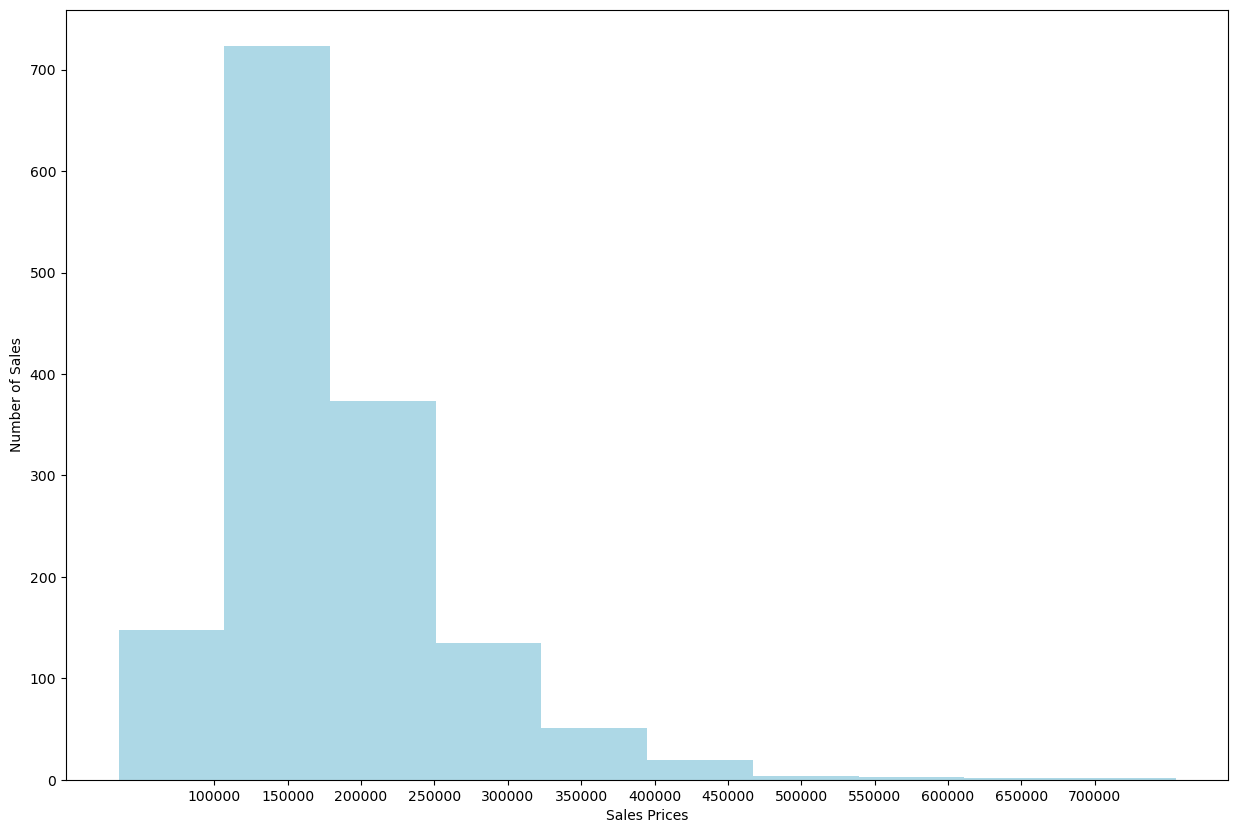

In [3]:
# Histogram of the prediction variable (SalesPrices)
plt.figure(figsize=(15,10))
plt.hist(training_df["SalePrice"], bins=10, color="lightblue")

plt.xlabel("Sales Prices", size=10)
plt.ylabel("Number of Sales", size=10)
plt.xticks(range(100000, 750000, 50000))
plt.show()

In [4]:
# Training data size
training_df.shape

(1460, 81)

In [5]:
# Training data columns
training_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
training_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [7]:
# Types of values
list(set(training_df.dtypes.tolist()))

[dtype('O'), dtype('int64'), dtype('float64')]

Number of Unique Categorical column -  43
[5, 2, 3, 4, 4, 2, 5, 3, 25, 9, 8, 5, 8, 6, 8, 15, 16, 4, 4, 5, 6, 5, 5, 5, 7, 7, 6, 5, 2, 6, 4, 7, 6, 7, 4, 6, 6, 3, 4, 5, 5, 9, 6]


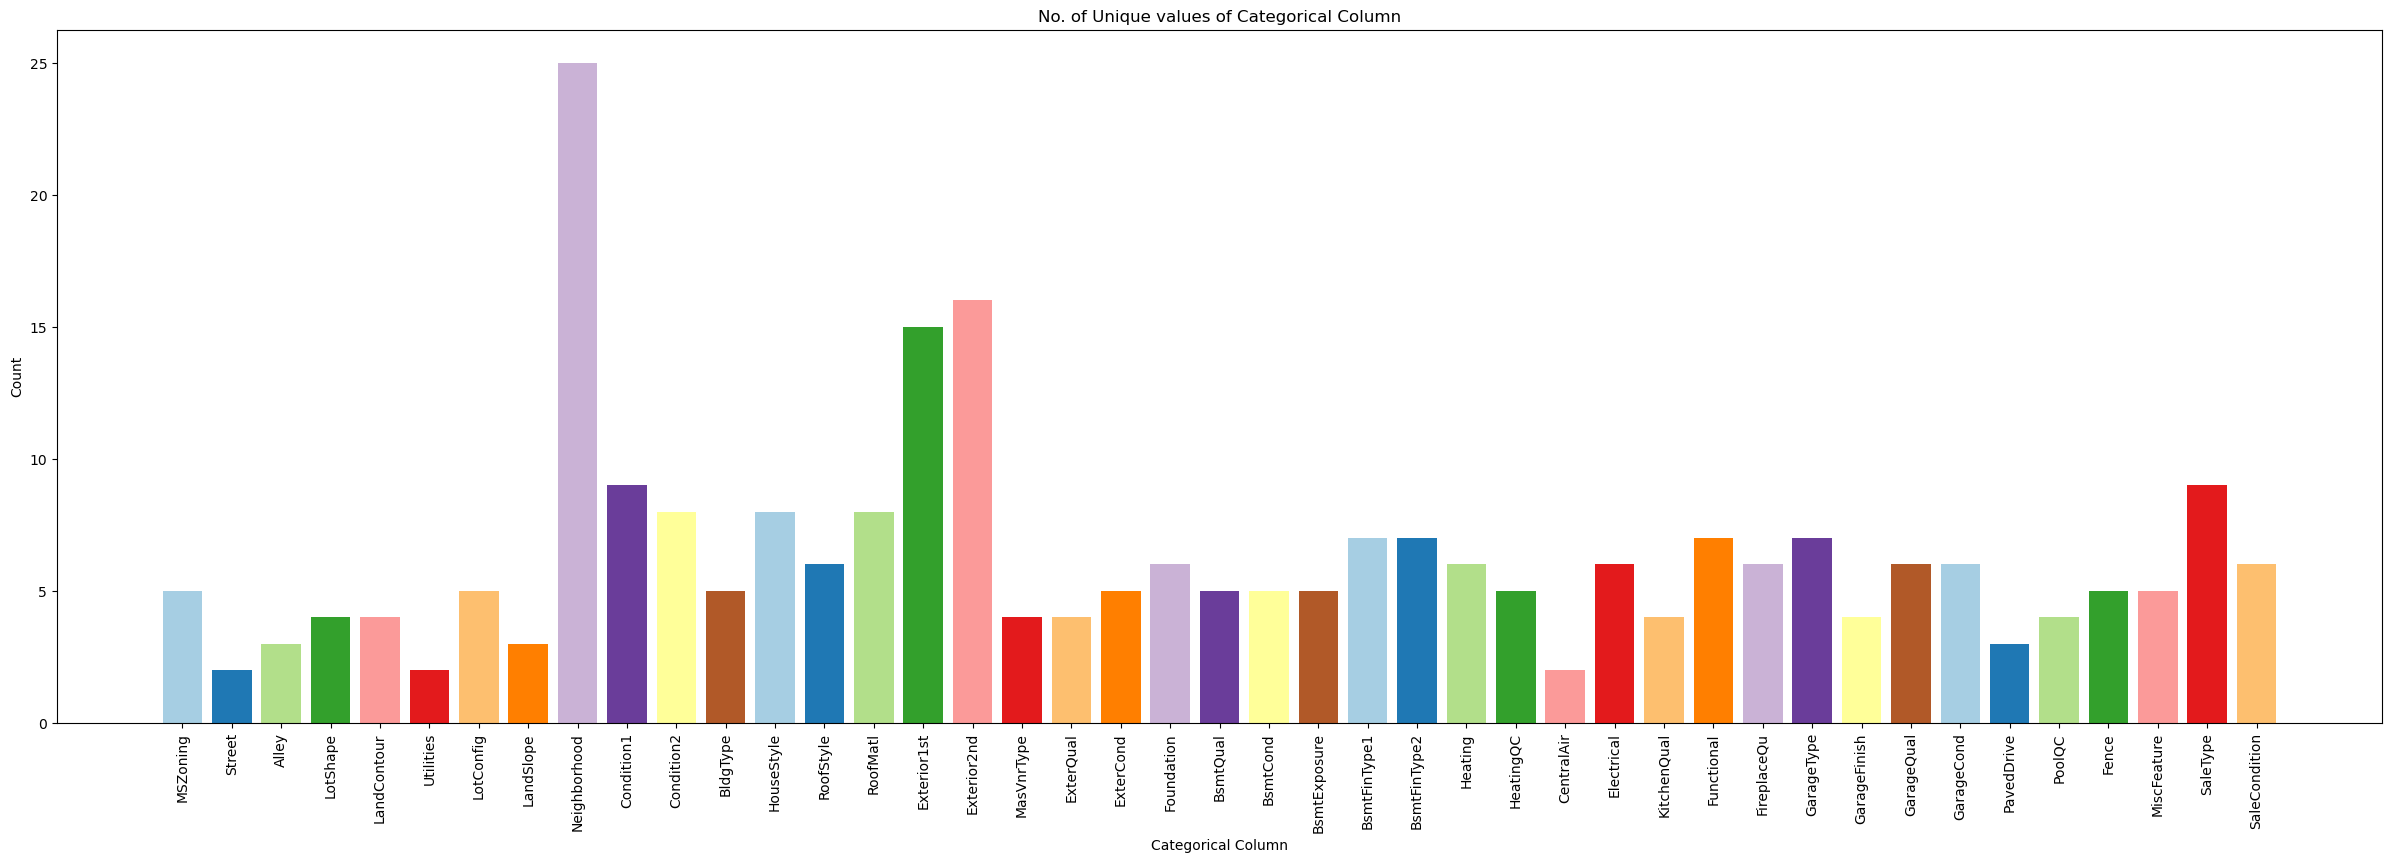

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

obj = (training_df.dtypes == 'object')
Catg_cols = list(obj[obj].index)
unique_vals = []

colors = sns.color_palette("Paired", n_colors=43)  # other palettes = "Set1", "Paired", etc.

for col in Catg_cols:
    unique_vals.append(training_df[col].unique().size)

print("Number of Unique Categorical column - ", len(Catg_cols))
print(unique_vals)

plt.figure(figsize=(30,9))
plt.title('No. of Unique values of Categorical Column')
plt.xlabel('Categorical Column')
plt.ylabel('Count')
plt.bar(Catg_cols, unique_vals, color=colors)
plt.xticks(rotation=90)
plt.show()

In [9]:
# Exploring Quantitative Values
numerical_df= training_df.select_dtypes(include = ['float64', 'int64'])
numerical_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

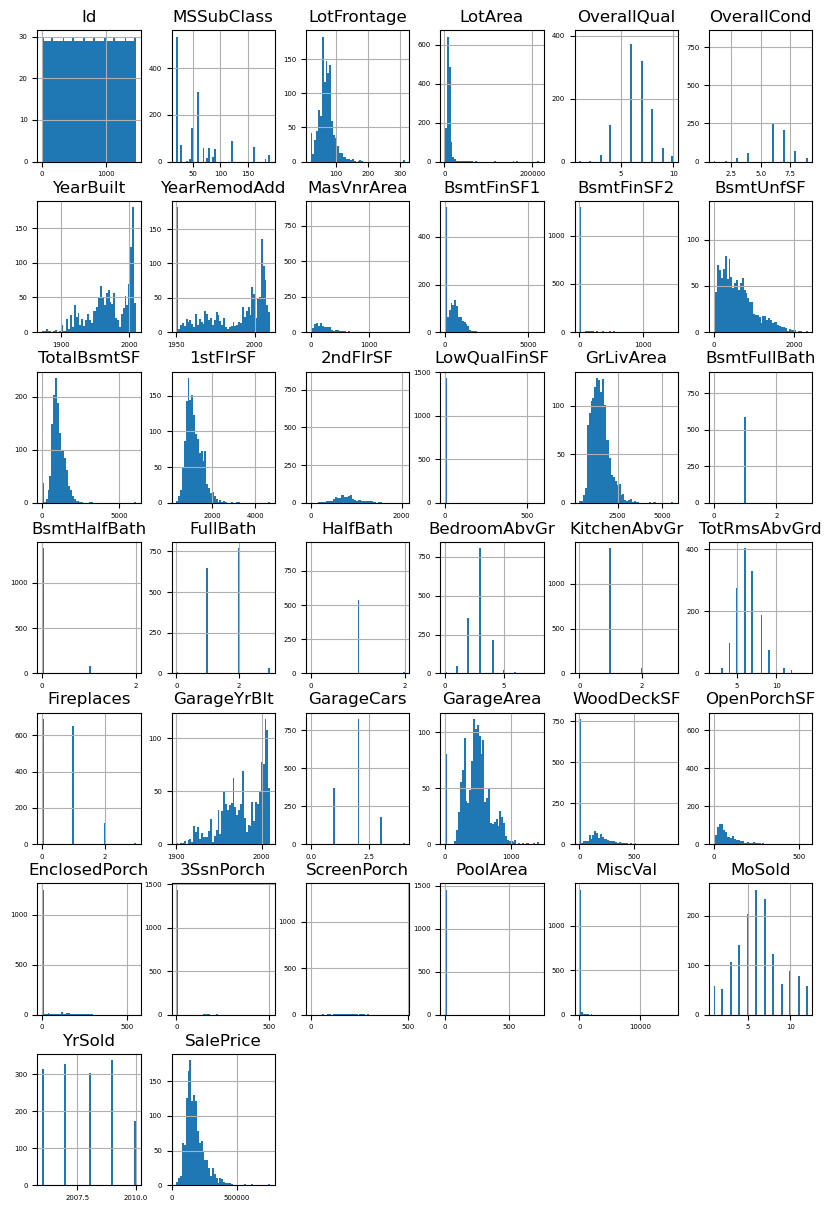

In [10]:
numerical_df.hist(figsize=(10, 15), bins=50, xlabelsize=5, ylabelsize=5)

## Data Preprocessing

In [11]:
# Handling Duplicates

# The parameter Keep='first' - considers first entry or value to be unique and labels other occurence as 'duplicates'

# Training Dataset
Train_Dup = (training_df.duplicated(keep='first'))

# Prints only the duplicate rows
print(training_df[Train_Dup])       # 0 Duplicates Found

# Test DataSet
Test_Dup = (test_df.duplicated(keep='first'))

# Prints only the duplicate rows
print(test_df[Test_Dup])            # 0 Duplicates Found

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]
Empty

In [12]:
# Identifying Missing Values and Count

# Training Dataset
Train_Miss_Val = training_df.isnull().sum()
Train_Miss_Count = Train_Miss_Val[Train_Miss_Val > 0]
# print(Train_Miss_Count)

# Test DataSet
Test_Miss_Val = test_df.isnull().sum()
Test_Miss_Count = Test_Miss_Val[Test_Miss_Val > 0]
# print(Test_Miss_Count)

In [13]:
# Handling Missing Values -- Categorical Columns

# Few columns - Alley, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 -  NA - represents meaningful value.
# Replacing those NA with meaningful missing values

meaningful_miss_vals = {
    'Alley':'NoAlley',
    'MasVnrType' : 'NoMasVnr',
    'FireplaceQu':'NoFire',
    'PoolQC':'NoPool',
    'Fence':'NoFence',
    'MiscFeature':'NoMisc',

    'BsmtQual':'NoBsmt',
    'BsmtCond':'NoBsmt',
    'BsmtExposure':'NoBsmt',
    'BsmtFinType1':'NoBsmt',
    'BsmtFinType2':'NoBsmt',

    'GarageType':'NoGrg',
    'GarageFinish':'NoGrg',
    'GarageQual':'NoGrg',
    'GarageCond':'NoGrg'
}


In [14]:
# Training DataSet - Replacing NA with meaningful missing values
for col, val in meaningful_miss_vals.items():
    if col in training_df.columns:
        training_df[col] = training_df[col].fillna(val)

Train_Miss_Val = training_df.isnull().sum()
Train_Miss_Count = Train_Miss_Val[Train_Miss_Val > 0]

# Prints the columns with missing values - yet to handle
print(Train_Miss_Count)


LotFrontage    259
MasVnrArea       8
Electrical       1
GarageYrBlt     81
dtype: int64


In [15]:
# Handling Numerical columns Missing Values -- Training DataSet

# Column - GarageYrBlt is dependent on GarageType column
# Hence GarageYrBlt cannot be substituted with Mean/ Median value
training_df.loc[(training_df['GarageType'] == 'NoGrg'), 'GarageYrBlt'] = None

# Calculating Median Value for column - LotFrontage
Lot_Median = training_df['LotFrontage']. median()
training_df['LotFrontage'] = training_df['LotFrontage'].fillna(Lot_Median)

# Assigning 0 to missing value for column - MasVnrArea
training_df['MasVnrArea'] = training_df['MasVnrArea'].fillna(0)

# Drop rows where column - 'Electrical' is Null
training_df = training_df.dropna(subset=['Electrical'])

Miss_Val = training_df.isnull().sum()
Miss_Count = Miss_Val[Miss_Val > 0]
print(Miss_Count)

GarageYrBlt    81
dtype: int64


In [16]:
# Test DataSet - Replacing NA with meaningful missing values
for col, val in meaningful_miss_vals.items():
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna(val)

Test_Miss_Val = test_df.isnull().sum()
Test_Miss_Count = Test_Miss_Val[Test_Miss_Val > 0]

# Prints the columns with missing values - yet to handle
print(Test_Miss_Count)


MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
GarageYrBlt      78
GarageCars        1
GarageArea        1
SaleType          1
dtype: int64


In [17]:
# Handling Numerical columns Missing Values -- Test DataSet

# Column - GarageYrBlt is dependent on GarageType column
# Hence GarageYrBlt cannot be substituted with Mean/ Median value
test_df.loc[(test_df['GarageType'] == 'NoGrg'), 'GarageYrBlt'] = None

# Calculating Median Value for column - LotFrontage, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath, GarageCars, GarageArea
Numcolumns_to_fill = ['LotFrontage', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']
test_df[Numcolumns_to_fill] = test_df[Numcolumns_to_fill].fillna(test_df[Numcolumns_to_fill].median())

# Assigning 0 to missing value for column - MasVnrArea,
test_df[['MasVnrArea','BsmtFinSF2','BsmtFinSF1']] = test_df[['MasVnrArea','BsmtFinSF2','BsmtFinSF1']].fillna(0)

CatCol_to_fill = ['MSZoning', 'Utilities', 'KitchenQual', 'Functional', 'SaleType','Exterior1st','Exterior2nd']
for column in CatCol_to_fill:
    mode_value = test_df[column].mode()[0]  # Get the mode (most frequent value) of the column
    test_df[column] = test_df[column].fillna(mode_value)  # Replace NaN with the mode


Miss_Val = test_df.isnull().sum()
Miss_Count = Miss_Val[Miss_Val > 0]
print(Miss_Count)

GarageYrBlt    78
dtype: int64


In [18]:
# Ordinal Encoding -- Training and Test Dataset

Ordinal_category_orders = {

    'ExterCond'   : {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'ExterQual'   : {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'HeatingQC'   : {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'KitchenQual' : {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'BsmtQual'    : {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NoBsmt' : 0},
    'BsmtCond'    : {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NoBsmt' : 0},
    'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NoBsmt' : 0},
    'BsmtFinType1': {'NoBsmt': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
    'BsmtFinType2': {'NoBsmt': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
    'FireplaceQu' : {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NoFire' : 0},
    'GarageCond'  : {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NoGrg' : 0},
    'GarageQual'  : {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NoGrg' : 0},
    'GarageFinish': {'Fin' : 3, 'RFn' : 2, 'Unf' : 1, 'NoGrg' : 0 },
    'PoolQC'      : {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NoPool' : 0}
}

# Gets the List of columns to encode
Ordinal_Cols = list(Ordinal_category_orders.keys())

# Apply Mapping - Training and Test Data
for col in Ordinal_Cols:
  training_df[col] = training_df[col].map(Ordinal_category_orders[col])
  test_df[col] = test_df[col].map(Ordinal_category_orders[col])


C:\Users\reala\AppData\Local\Temp\ipykernel_15032\1441071268.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[col] = training_df[col].map(Ordinal_category_orders[col])
C:\Users\reala\AppData\Local\Temp\ipykernel_15032\1441071268.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[col] = training_df[col].map(Ordinal_category_orders[col])
C:\Users\reala\AppData\Local\Temp\ipykernel_15032\1441071268.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [19]:
print("Training Data Shape", training_df.columns)
print("Test Data Shape", test_df.columns)


Training Data Shape Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'Gara

In [20]:
# Training DataSet - One-Hot Encoding

# Identify categorical columns
train_categorical_columns = training_df.select_dtypes(include=['object']).columns

#Apply One-Hot Encoding for remaining categorical column - Training
training_df_encoded = pd.get_dummies(training_df, columns=train_categorical_columns, drop_first=False).replace({True: 1, False: 0})

training_df_encoded.shape


C:\Users\reala\AppData\Local\Temp\ipykernel_15032\1422518581.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  training_df_encoded = pd.get_dummies(training_df, columns=train_categorical_columns, drop_first=False).replace({True: 1, False: 0})


(1459, 245)

In [21]:
# Test DataSet - One-Hot Encoding

# Identify categorical columns
Test_categorical_columns = test_df.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding for remaining categorical column - Test
test_df_encoded = pd.get_dummies(test_df, columns=Test_categorical_columns, drop_first=False).replace({True: 1, False: 0})

test_df_encoded.shape


C:\Users\reala\AppData\Local\Temp\ipykernel_15032\1552954966.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df_encoded = pd.get_dummies(test_df, columns=Test_categorical_columns, drop_first=False).replace({True: 1, False: 0})


(1459, 228)

In [22]:
# Training Data - 245columns Test Data - 228 Columns
# Handling the Column count mismatch and match test dataset colum order to training dataset column order

# Identifies the Missing columns
Missing_Cols = set(training_df_encoded.columns) - set(test_df_encoded.columns)

print(len(Missing_Cols))
Missing_Cols

# Adding missing columns to the test set with default values 0
for cols in Missing_Cols:
  test_df_encoded[cols]=0

# Ensure that the columns in both the train and test data are in the same order
test_df_encoded = test_df_encoded[training_df_encoded.columns]

test_df_encoded

17


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,3,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,3,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,3,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,3,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,4,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,3,...,0,0,0,1,0,0,0,0,1,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,3,...,0,0,0,1,1,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,3,...,0,0,0,1,1,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,3,...,0,0,0,1,0,0,0,0,1,0


In [23]:
# Checking is the Training and test dataset has the same column order
if list(training_df_encoded.columns) == list(test_df_encoded.columns):
  print("same")
else:
  print("different")

same


In [24]:
print(test_df_encoded['SalePrice'])

0       0
1       0
2       0
3       0
4       0
       ..
1454    0
1455    0
1456    0
1457    0
1458    0
Name: SalePrice, Length: 1459, dtype: int64


In [25]:
training_df_encoded['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1459, dtype: int64

## Model Training

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([10.46027076, 10.46237782, 10.46448489, ..., 13.53026023,
        13.53236729, 13.53447435]),
 <BarContainer object of 1459 artists>)

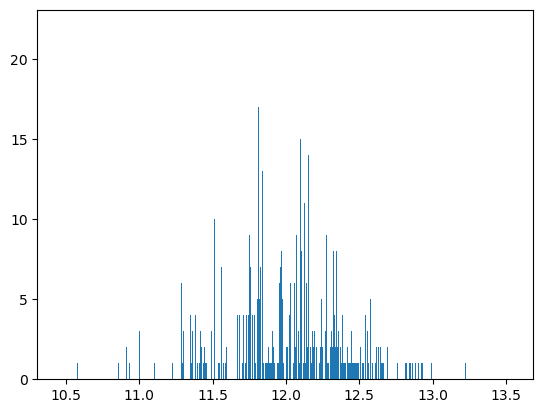

In [39]:
# Print sales price histogram larger to view skewness
plt.hist(training_df_encoded['SalePrice'], bins=1459)

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([10.46027076, 10.46237782, 10.46448489, ..., 13.53026023,
        13.53236729, 13.53447435]),
 <BarContainer object of 1459 artists>)

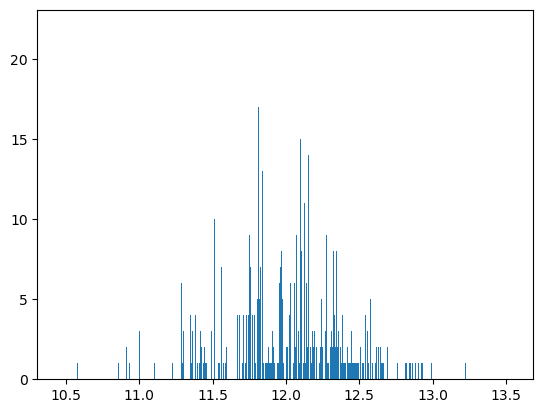

In [27]:
### Remove skewness in data by taking the log since it is right skewed
training_df_encoded['SalePrice']=np.log1p(training_df_encoded['SalePrice'])
plt.hist(training_df_encoded['SalePrice'], bins=1459)

In [28]:
# Separate features (X) and target (y) from training data
X = training_df_encoded.drop(columns=['SalePrice', 'Id'])  # Drop SalePrice and Id
y = training_df_encoded['SalePrice']

In [29]:
# Split the training data set into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [30]:
# Train a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [31]:
# Predict with the test model
y_pred = model.predict(X_test)
y_pred

array([11.35487638, 11.8651841 , 11.6310665 , 11.93763881, 11.41970445,
       11.34382642, 12.25858907, 12.42276478, 12.53532436, 12.02492656,
       12.01730573, 12.17900871, 12.13254198, 12.17899644, 12.34671824,
       12.02972534, 12.18017993, 11.73781921, 11.7034851 , 12.24980135,
       12.00029661, 12.29183909, 11.61492361, 12.04689741, 12.20258083,
       12.04441856, 12.16624619, 11.53518314, 12.07403392, 11.88110854,
       11.71324664, 12.48427067, 12.13995266, 11.64456752, 11.79851491,
       12.17147464, 11.73697165, 12.23449036, 11.82993394, 11.54076421,
       11.72070782, 12.36770044, 11.1831531 , 12.75284077, 12.70447366,
       11.9500495 , 11.56874168, 11.76299804, 12.92493002, 12.06205835,
       12.19183121, 11.44925523, 11.70297175, 12.05079666, 11.97416577,
       12.41070194, 12.1536801 , 12.06678046, 11.66147203, 11.5796269 ,
       11.2608105 , 12.13409868, 12.6359841 , 12.33066481, 12.37401201,
       12.20432025, 11.59143765, 12.63509182, 12.16281151, 12.02

In [32]:
# Calculate Mean Squared Error and R^2 on training data
mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
r2 = r2_score(y_pred, y_test)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.019992776745004687
Mean Absolute Error: 0.019992776745004687
R-squared: 0.8452416310756313


In [33]:
y_pred = np.expm1(y_pred)
y_pred

array([ 85379.78702144, 142226.632717  , 112539.28177114, 152914.20160507,
        91098.21371178,  84441.52662853, 210782.97475015, 248391.33630953,
       277984.53653541, 166861.69391441, 165594.89542733, 194658.80315533,
       185820.5304762 , 194656.41394951, 230202.33094882, 167664.35542542,
       194886.92545436, 125217.96562605, 120991.65263837, 208938.77917466,
       162802.07300385, 217909.36565004, 110737.1420697 , 170568.37994757,
       199301.85522135, 170146.08635241, 192190.23924277, 102249.72282049,
       175260.41259056, 144509.65743632, 122178.51059263, 264148.54313702,
       187202.70969888, 114068.99406724, 133053.60766681, 193197.73197311,
       125111.88011492, 205764.06951814, 137300.42135759, 102821.98626711,
       123093.52294253, 235083.53336661,  71907.74046684, 345531.0811699 ,
       329216.4203345 , 154823.81009405, 105739.33311413, 128410.86085054,
       410416.41867437, 173174.07314368, 197170.89901934,  93830.43742824,
       120929.55698115, 1

In [34]:
# Predict with actual test_df data
x_test_df = test_df_encoded.drop(columns=['Id','SalePrice'])

In [35]:
# Predict with actual test_df data
predictions = model.predict(x_test_df)
predictions

array([11.72827501, 11.94379954, 12.11770893, ..., 11.95479044,
       11.62465537, 12.34953251])

In [36]:
# Convert predictions back to dollar amounts
predictions = np.expm1(predictions)
predictions

array([124028.53562145, 153859.17867244, 183084.57285875, ...,
       155559.56827002, 111820.07972905, 230851.09545244])

In [37]:
# Create a DataFrame to save predictions alongside the Ids from the test set
output_df = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': predictions
})

In [38]:
# Export to csv
output_df.to_csv('SalePricePredictions.csv', index=False)